In [1]:
import pandas as pd
from datetime import datetime
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

%matplotlib inline

In [2]:
data = yf.download("BTC-USD, ETH-USD, XRP-USD, BNB-USD, ADA-USD, DOGE-USD, TRX-USD, ENJ-USD, XMR-USD, ZEC-USD, ZEN-USD, MKR-USD, BCH-USD, XEM-USD, XLM-USD, DASH-USD, EOS-USD, NEO-USD, ETC-USD, LSK-USD, XVG-USD" 
                   , start="2018-01-01", end="2022-10-26")


[*********************100%***********************]  21 of 21 completed


In [3]:
data_df = pd.DataFrame(data)
data_df = data_df.drop(columns = ['Adj Close', 'High', 'Low', 'Open', 'Volume'])
data_df.tail()

Close                                                   \
             ADA-USD     BCH-USD     BNB-USD       BTC-USD   DASH-USD   
Date                                                                    
2022-10-21  0.349077  107.005615  270.038422  19172.468750  40.620937   
2022-10-22  0.351409  108.700371  270.479492  19208.189453  40.825829   
2022-10-23  0.362099  110.886421  276.008179  19567.007812  41.687363   
2022-10-24  0.357857  107.931328  273.977417  19345.572266  40.126072   
2022-10-25  0.401988  112.795784  284.432526  20095.857422  41.409409   

                                                                  ...  \
            DOGE-USD   ENJ-USD   EOS-USD    ETC-USD      ETH-USD  ...   
Date                                                              ...   
2022-10-21  0.059334  0.414597  1.071482  22.045107  1299.946411  ...   
2022-10-22  0.059694  0.414807  1.067446  23.235781  1314.299194  ...   
2022-10-23  0.060347  0.422756  1.093887  23.407028  1363.447021  ...   
2022-10-24  0.059506  0.415391  1.067241  22.661222  1344.998535  ...   
2022-10-25  0.062882  0.435501  1.100329  24.741207  1461.665405  ...   

                                                                             \
                MKR-USD   NEO-USD   TRX-USD   XEM-USD   XLM-USD     XMR-USD   
Date                                                                          
2022-10-21  1015.699341  7.847687  0.061662  0.037247  0.110925  140.729477   
2022-10-22   996.736389  8.020635  0.061640  0.037396  0.111254  142.801865   
2022-10-23   978.696289  8.552398  0.061880  0.038073  0.111954  144.488083   
2022-10-24   926.776367  8.206306  0.061365  0.037619  0.110319  143.225418   
2022-10-25   945.888794  8.528126  0.062412  0.038556  0.112014  144.185669   

                                                      
             XRP-USD   XVG-USD    ZEC-USD    ZEN-USD  
Date                                                  
2022-10-21  0.461098  0.003108  52.119930  12.741133  
2022-10-22  0.465470  0.003156  52.349773  12.738607  
2022-10-23  0.469033  0.003174  53.081825  13.069641  
2022-10-24  0.453821  0.003109  51.992268  12.917255  
2022-10-25  0.461544  0.003140  53.422733  13.224254  

[5 rows x 21 columns]

In [4]:
data_df.isna().sum()

Close  ADA-USD     0
       BCH-USD     0
       BNB-USD     0
       BTC-USD     0
       DASH-USD    0
       DOGE-USD    0
       ENJ-USD     0
       EOS-USD     0
       ETC-USD     0
       ETH-USD     0
       LSK-USD     0
       MKR-USD     0
       NEO-USD     0
       TRX-USD     0
       XEM-USD     0
       XLM-USD     0
       XMR-USD     0
       XRP-USD     0
       XVG-USD     0
       ZEC-USD     0
       ZEN-USD     0
dtype: int64

In [5]:
daily_change = data_df.pct_change()
daily_change.tail()

Close                                                    \
             ADA-USD   BCH-USD   BNB-USD   BTC-USD  DASH-USD  DOGE-USD   
Date                                                                     
2022-10-21  0.025931  0.005785  0.002849  0.006231  0.021911 -0.003393   
2022-10-22  0.006680  0.015838  0.001633  0.001863  0.005044  0.006067   
2022-10-23  0.030420  0.020111  0.020440  0.018680  0.021103  0.010939   
2022-10-24 -0.011715 -0.026650 -0.007358 -0.011317 -0.037452 -0.013936   
2022-10-25  0.123320  0.045070  0.038160  0.038783  0.031983  0.056734   

                                                    ...                      \
             ENJ-USD   EOS-USD   ETC-USD   ETH-USD  ...   MKR-USD   NEO-USD   
Date                                                ...                       
2022-10-21 -0.000203  0.028305  0.016988  0.013050  ... -0.033796  0.012031   
2022-10-22  0.000506 -0.003767  0.054011  0.011041  ... -0.018670  0.022038   
2022-10-23  0.019163  0.024770  0.007370  0.037395  ... -0.018099  0.066299   
2022-10-24 -0.017421 -0.024359 -0.031862 -0.013531  ... -0.053050 -0.040467   
2022-10-25  0.048412  0.031003  0.091786  0.086741  ...  0.020622  0.039216   

                                                                        \
             TRX-USD   XEM-USD   XLM-USD   XMR-USD   XRP-USD   XVG-USD   
Date                                                                     
2022-10-21 -0.008857  0.010636  0.007630 -0.003386  0.029044 -0.000322   
2022-10-22 -0.000357  0.004000  0.002966  0.014726  0.009482  0.015444   
2022-10-23  0.003894  0.018104  0.006292  0.011808  0.007655  0.005703   
2022-10-24 -0.008323 -0.011924 -0.014604 -0.008739 -0.032433 -0.020479   
2022-10-25  0.017062  0.024908  0.015365  0.006704  0.017018  0.009971   

                                
             ZEC-USD   ZEN-USD  
Date                            
2022-10-21  0.002543 -0.001117  
2022-10-22  0.004410 -0.000198  
2022-10-23  0.013984  0.025987  
2022-10-24 -0.020526 -0.011660  
2022-10-25  0.027513  0.023767  

[5 rows x 21 columns]

<AxesSubplot:xlabel='Date'>

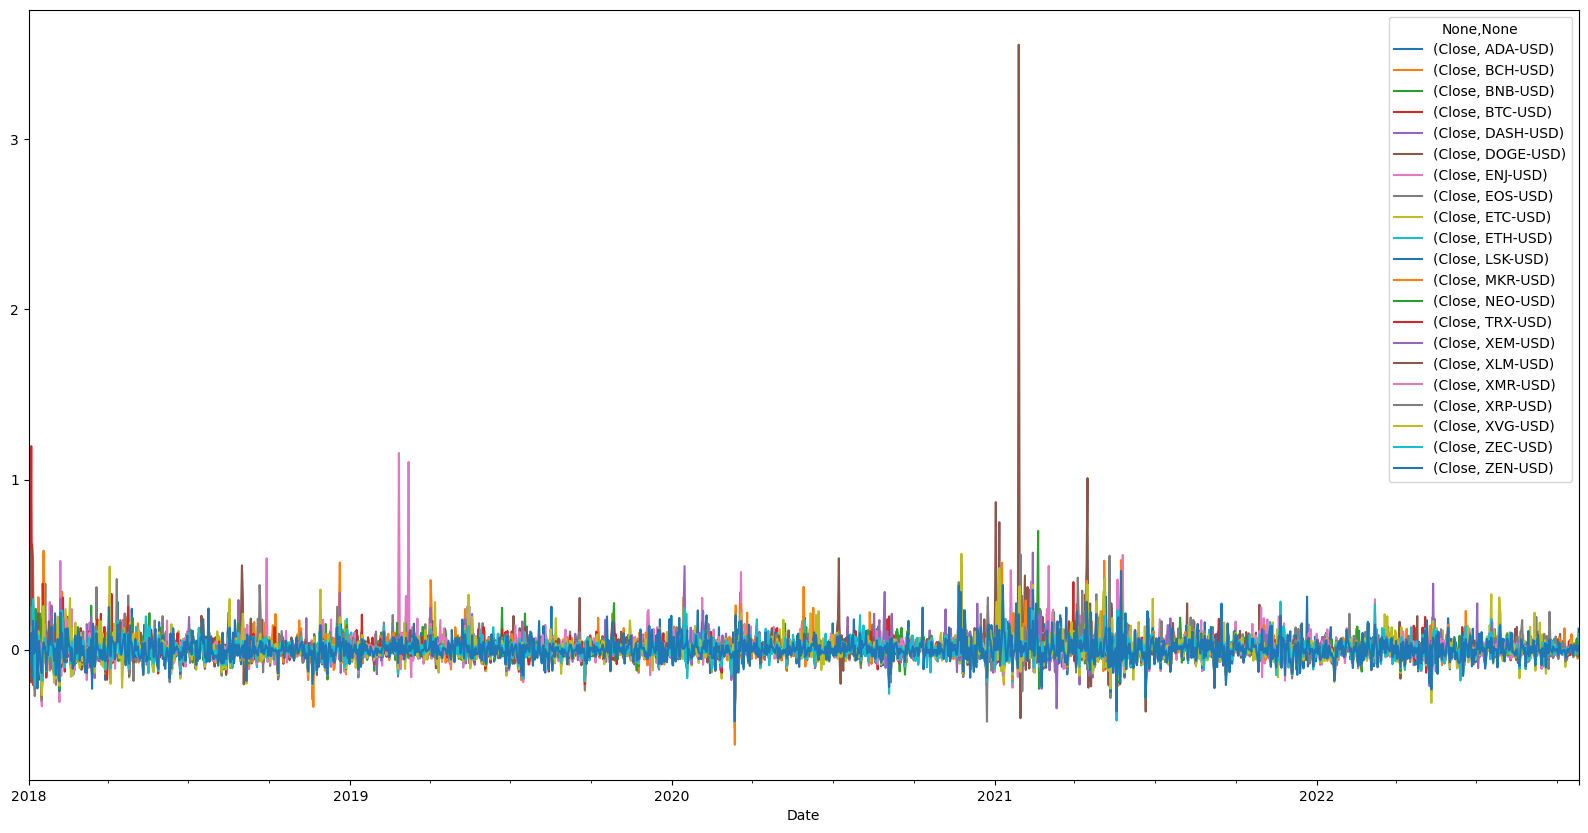

In [6]:
daily_change.plot(figsize=(20,10))

In [7]:
all_time_change = data_df.pct_change(periods=1758).dropna()
all_time_change.sort_values(by = '2022-10-25', axis = 1)

Close                                                  \
             XVG-USD   XEM-USD  DASH-USD  LSK-USD  BCH-USD   ZEC-USD   
Date                                                                   
2022-10-25 -0.979889 -0.962976 -0.960711 -0.95384 -0.95363 -0.907444   

                                                    ...                      \
             NEO-USD   EOS-USD   XRP-USD   XLM-USD  ...   XMR-USD   ADA-USD   
Date                                                ...                       
2022-10-25 -0.891808 -0.875573 -0.806969 -0.766641  ... -0.598357 -0.448317   

                                                                        \
             ETC-USD   MKR-USD   TRX-USD   BTC-USD   ETH-USD   ENJ-USD   
Date                                                                     
2022-10-25 -0.275893 -0.024942  0.207312  0.471448  0.891778  1.449966   

                                 
            DOGE-USD    BNB-USD  
Date                             
2022-10-25  6.058255  32.802224  

[1 rows x 21 columns]

In [8]:
daily_change.describe()

Close                                                      \
           ADA-USD      BCH-USD      BNB-USD      BTC-USD     DASH-USD   
count  1758.000000  1758.000000  1758.000000  1758.000000  1758.000000   
mean      0.001432     0.000124     0.003677     0.000982    -0.000141   
std       0.059840     0.061478     0.059148     0.038729     0.058822   
min      -0.395672    -0.429560    -0.419046    -0.371695    -0.372153   
25%      -0.029633    -0.026157    -0.021774    -0.015838    -0.027050   
50%      -0.000266    -0.001109     0.000861     0.001165    -0.000045   
75%       0.029270     0.025197     0.027529     0.017665     0.025465   
max       0.379604     0.523201     0.697604     0.187465     0.570359   

                                                                        ...  \
          DOGE-USD      ENJ-USD      EOS-USD      ETC-USD      ETH-USD  ...   
count  1758.000000  1758.000000  1758.000000  1758.000000  1758.000000  ...   
mean      0.004653     0.003724     0.000844     0.001737     0.001647  ...   
std       0.111696     0.085029     0.064076     0.062487     0.050178  ...   
min      -0.402570    -0.464328    -0.396028    -0.397328    -0.423472  ...   
25%      -0.024116    -0.036193    -0.024504    -0.023982    -0.022255  ...   
50%      -0.001279    -0.001135    -0.000102     0.000466     0.000797  ...   
75%       0.019117     0.035148     0.026713     0.024962     0.027014  ...   
max       3.555466     1.155946     0.552082     0.422583     0.259475  ...   

                                                                        \
           MKR-USD      NEO-USD      TRX-USD      XEM-USD      XLM-USD   
count  1758.000000  1758.000000  1758.000000  1758.000000  1758.000000   
mean      0.001888     0.000569     0.002171     0.000037     0.000902   
std       0.062294     0.060212     0.067147     0.062168     0.060326   
min      -0.558768    -0.372267    -0.407347    -0.344734    -0.336317   
25%      -0.028662    -0.028999    -0.024844    -0.029321    -0.028302   
50%      -0.000756     0.000350     0.000979     0.000487    -0.001062   
75%       0.026988     0.029251     0.025197     0.026668     0.024590   
max       0.581638     0.288004     1.196066     0.543105     0.749244   

                                                                        
           XMR-USD      XRP-USD      XVG-USD      ZEC-USD      ZEN-USD  
count  1758.000000  1758.000000  1758.000000  1758.000000  1758.000000  
mean      0.000926     0.000858     0.000333     0.000429     0.001458  
std       0.053199     0.060572     0.072268     0.059397     0.067775  
min      -0.413860    -0.423340    -0.416794    -0.416922    -0.420523  
25%      -0.024447    -0.023382    -0.035955    -0.029034    -0.033731  
50%       0.001702    -0.001116    -0.000846    -0.001448    -0.000941  
75%       0.028358     0.020789     0.031827     0.030002     0.031521  
max       0.411925     0.560109     0.563800     0.297870     0.462295  

[8 rows x 21 columns]

In [9]:
average = daily_change.mean()
average = average.sort_values()
average

Close  DASH-USD   -0.000141
       XEM-USD     0.000037
       BCH-USD     0.000124
       LSK-USD     0.000187
       XVG-USD     0.000333
       ZEC-USD     0.000429
       NEO-USD     0.000569
       EOS-USD     0.000844
       XRP-USD     0.000858
       XLM-USD     0.000902
       XMR-USD     0.000926
       BTC-USD     0.000982
       ADA-USD     0.001432
       ZEN-USD     0.001458
       ETH-USD     0.001647
       ETC-USD     0.001737
       MKR-USD     0.001888
       TRX-USD     0.002171
       BNB-USD     0.003677
       ENJ-USD     0.003724
       DOGE-USD    0.004653
dtype: float64

In [10]:
std = daily_change.std()
std = std.sort_values()
std

Close  BTC-USD     0.038729
       ETH-USD     0.050178
       XMR-USD     0.053199
       DASH-USD    0.058822
       BNB-USD     0.059148
       ZEC-USD     0.059397
       ADA-USD     0.059840
       NEO-USD     0.060212
       XLM-USD     0.060326
       XRP-USD     0.060572
       BCH-USD     0.061478
       LSK-USD     0.062013
       XEM-USD     0.062168
       MKR-USD     0.062294
       ETC-USD     0.062487
       EOS-USD     0.064076
       TRX-USD     0.067147
       ZEN-USD     0.067775
       XVG-USD     0.072268
       ENJ-USD     0.085029
       DOGE-USD    0.111696
dtype: float64

In [11]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_change).cumprod()
cumulative_returns.head()

Close                                                    \
             ADA-USD   BCH-USD   BNB-USD   BTC-USD  DASH-USD  DOGE-USD   
Date                                                                     
2018-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2018-01-02  1.074013  1.114473  1.050289  1.097011  1.155354  1.026490   
2018-01-03  1.481712  1.072414  1.133253  1.113039  1.110780  1.046133   
2018-01-04  1.529005  0.999030  1.094999  1.142196  1.166806  1.082501   
2018-01-05  1.371783  1.062461  1.772774  1.276213  1.093389  1.365698   

                                                    ...                      \
             ENJ-USD   EOS-USD   ETC-USD   ETH-USD  ...   MKR-USD   NEO-USD   
Date                                                ...                       
2018-01-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2018-01-02  1.101233  1.055583  1.021927  1.144702  ...  1.095852  1.145922   
2018-01-03  1.251910  1.156586  1.020355  1.246012  ...  1.107666  1.339178   
2018-01-04  1.928437  1.275050  1.062928  1.269570  ...  1.072329  1.257350   
2018-01-05  2.055508  1.225758  1.059459  1.291311  ...  1.130602  1.208796   

                                                                        \
             TRX-USD   XEM-USD   XLM-USD   XMR-USD   XRP-USD   XVG-USD   
Date                                                                     
2018-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2018-01-02  1.522043  1.114090  1.176576  1.068044  1.037586  0.928099   
2018-01-03  1.831957  1.719158  1.867108  1.147840  1.298758  0.930123   
2018-01-04  4.023097  1.579467  1.508412  1.122728  1.336926  1.019554   
2018-01-05  4.266467  1.528554  1.380627  1.072275  1.275061  1.160013   

                                
             ZEC-USD   ZEN-USD  
Date                            
2018-01-01       NaN       NaN  
2018-01-02  1.010937  0.926313  
2018-01-03  1.008136  0.891146  
2018-01-04  1.031180  0.977632  
2018-01-05  1.020205  0.815739  

[5 rows x 21 columns]

<AxesSubplot:xlabel='Date'>

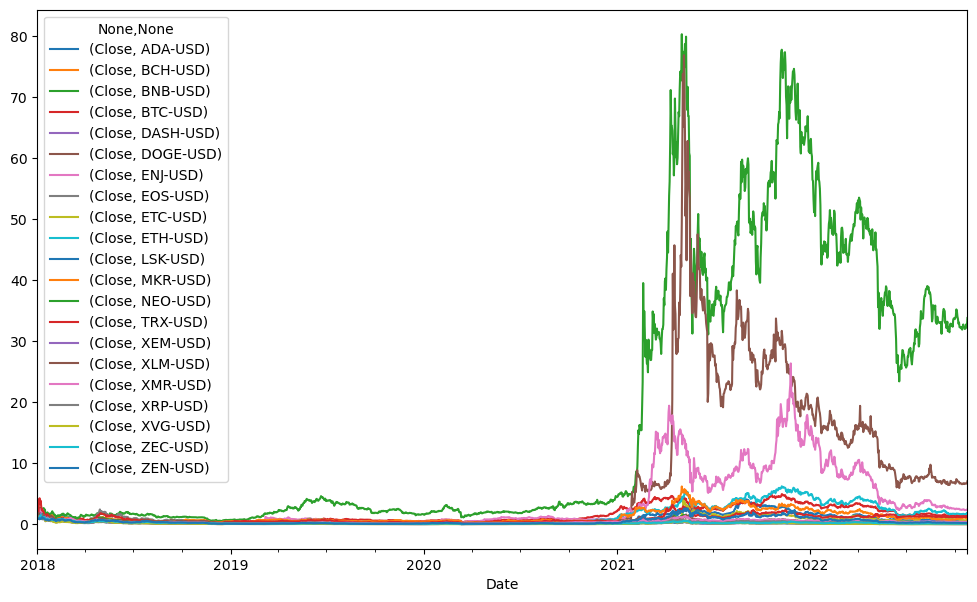

In [12]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(12,7))

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

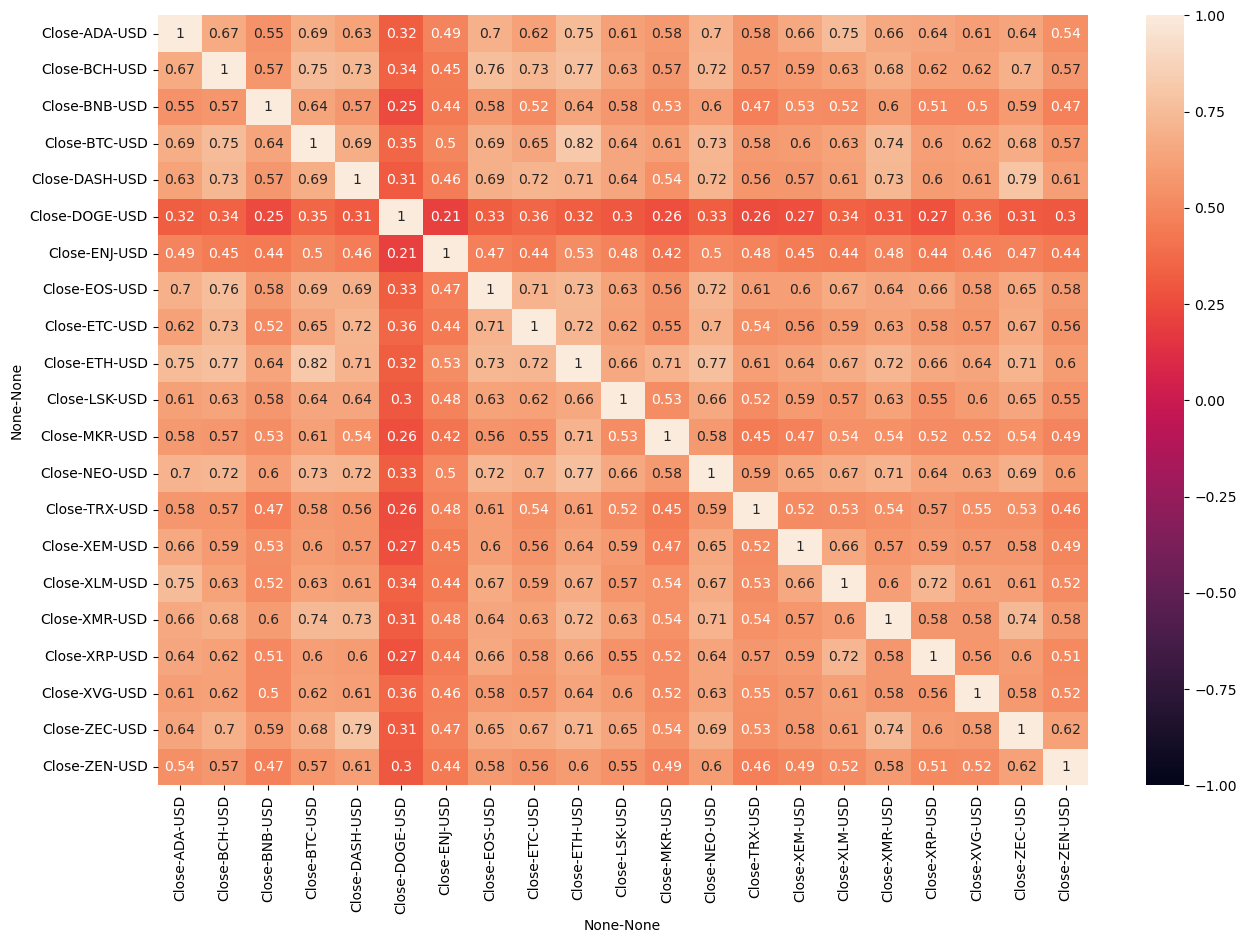

In [13]:
# Calculate the correlation
correlation = daily_change.corr()
# Display correlation matrix
plt.figure(figsize = (15,10))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)